# Dependencies

In [3]:
# Data wrangling
import pandas as pd
import numpy as np

# Scikit
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score

# XGB
from xgboost import XGBRegressor

# Data viz
import matplotlib.pyplot as plt
import seaborn as sns



# EDA

In [4]:
df = pd.read_csv("C:/Users/rerr_/OneDrive/Desktop/portafolio/ml_scikit_regression/data/life_expectancy_data.csv")
df.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
df.shape

(2938, 21)

In [6]:
df.columns

Index(['Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [7]:
df.dtypes

Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [8]:
df.isna().sum()

Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [9]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


# Cleaning data

## rounding numbers

In [10]:
df = df.round(2)
df.head(5)

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,Developing,65.0,263.0,62,0.01,71.28,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.26,33736494.0,17.2,17.3,0.48,10.1
1,2014,Developing,59.9,271.0,64,0.01,73.52,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.70,327582.0,17.5,17.5,0.48,10.0
2,2013,Developing,59.9,268.0,66,0.01,73.22,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.74,31731688.0,17.7,17.7,0.47,9.9
3,2012,Developing,59.5,272.0,69,0.01,78.18,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.96,3696958.0,17.9,18.0,0.46,9.8
4,2011,Developing,59.2,275.0,71,0.01,7.10,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.54,2978599.0,18.2,18.2,0.45,9.5


## column normalization

In [11]:
df.columns

Index(['Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [12]:
# normalize names (blank spaces, capital letters, etc.)
df.columns = df.columns.str.strip().str.replace("  ", " ").str.replace(" ", "_").str.replace("-", "_").str.lower()
df.columns

Index(['year', 'status', 'life_expectancy', 'adult_mortality', 'infant_deaths',
       'alcohol', 'percentage_expenditure', 'hepatitis_b', 'measles', 'bmi',
       'under_five_deaths', 'polio', 'total_expenditure', 'diphtheria',
       'hiv/aids', 'gdp', 'population', 'thinness_1_19_years',
       'thinness_5_9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

## nulls

In [13]:
# Identify columns with null values
df.isna().sum()

year                                 0
status                               0
life_expectancy                     10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles                              0
bmi                                 34
under_five_deaths                    0
polio                               19
total_expenditure                  226
diphtheria                          19
hiv/aids                             0
gdp                                448
population                         652
thinness_1_19_years                 34
thinness_5_9_years                  34
income_composition_of_resources    167
schooling                          163
dtype: int64

In [14]:
# Columns with null values
columns_with_null_values = [
    "life_expectancy",
    "adult_mortality",
    "alcohol",
    "hepatitis_b",
    "bmi",
    "polio",
    "total_expenditure",
    "diphtheria",
    "gdp",
    "population",
    "thinness_1_19_years",
    "thinness_5_9_years",
    "income_composition_of_resources",
    "schooling"
]

When the relative deviation between the mean and median is greater than 5%, I opt for the median to mitigate the influence of skewness or outliers.

In [15]:
# Comparison between mean and median values to fill nulls
df_null = df[columns_with_null_values]
diff = df_null.describe()
diff.loc["diff_%"] = ((diff.loc["mean"] - diff.loc["50%"]) / diff.loc["mean"]) * 100
diff.loc[["mean", "50%", "diff_%"]]

,life_expectancy,adult_mortality,alcohol,hepatitis_b,bmi,polio,total_expenditure,diphtheria,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
mean,69.224932,164.796448,4.602861,80.940461,38.321247,82.550188,5.938190,82.324084,7483.158582,1.275338e+07,4.839704,4.870317,0.627571,11.992793
50%,72.100000,144.000000,3.755000,92.000000,43.500000,93.000000,5.755000,93.000000,1766.945000,1.386542e+06,3.300000,3.300000,0.680000,12.300000
diff_%,-4.153227,12.619476,18.420300,-13.663795,-13.514053,-12.658737,3.084939,-12.968157,76.387711,8.912804e+01,31.814010,32.242601,-8.354227,-2.561599


In [16]:
# Columns using mean value
fill_null_mean = [
    "year",
    "life_expectancy",
    "total_expenditure",
    "schooling"]

year_mean = df["year"].mean().round(2)
life_expectancy_mean = df["life_expectancy"].mean().round(2)
total_expenditure_mean = df["total_expenditure"].mean().round(2)
schooling_mean = df["schooling"].mean().round(2)

print(f"Year mean: {year_mean}")
print(f"Life expectancy mean: {life_expectancy_mean}")
print(f"Total expenditure mean: {total_expenditure_mean}")
print(f"Schooling mean: {schooling_mean}")

Year mean: 2007.52
Life expectancy mean: 69.22
Total expenditure mean: 5.94
Schooling mean: 11.99


In [17]:
# Columns using median value
fill_null_median = [
    "adult_mortality",
    "alcohol", 
    "hepatitis_b",
    "bmi",
    "polio", 
    "diphtheria", 
    "gdp", 
    "population", 
    "thinness_1_19_years", 
    "thinness_5_9_years",
    "income_composition_of_resources"]

adult_mortality_median = df["adult_mortality"].median().round(2)
alcohol_median = df["alcohol"].median().round(2)
hepatitis_b_median = df["hepatitis_b"].median().round(2)
bmi_median = df["bmi"].median().round(2)
polio_median = df["polio"].median().round(2)
diphtheria_median = df["diphtheria"].median().round(2)
gdp_median = df["gdp"].median().round(2)
population_median = df["population"].median().round(2)
thinness_1_19_years_median = df["thinness_1_19_years"].median().round(2)
thinness_5_9_years_median = df["thinness_5_9_years"].median().round(2)
income_composition_of_resources_median = df["income_composition_of_resources"].median().round(2)


print(f"Adult mortality median: {adult_mortality_median}")
print(f"Alcohol median: {alcohol_median}")
print(f"Hepatitis_B median: {hepatitis_b_median}")
print(f"BMI median: {bmi_median}")
print(f"Polio median: {polio_median}")
print(f"Diphtheria median: {diphtheria_median}")
print(f"GDP median: {gdp_median}")
print(f"Population median: {population_median}")
print(f"Thinness 1-19 years median: {thinness_1_19_years_median}")
print(f"Thinness 5-9 years median: {thinness_5_9_years_median}")
print(f"Income composition of resources median: {income_composition_of_resources_median}")

Adult mortality median: 144.0
Alcohol median: 3.76
Hepatitis_B median: 92.0
BMI median: 43.5
Polio median: 93.0
Diphtheria median: 93.0
GDP median: 1766.95
Population median: 1386542.0
Thinness 1-19 years median: 3.3
Thinness 5-9 years median: 3.3
Income composition of resources median: 0.68


In [18]:
# Fill null values with mean
for col in fill_null_mean:
    df[col] = df[col].fillna(df[col].mean())

# Fill null values with median
for col in fill_null_median:
    df[col] = df[col].fillna(df[col].median())

# Corroborate nulls
df.isna().sum()

year                               0
status                             0
life_expectancy                    0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
percentage_expenditure             0
hepatitis_b                        0
measles                            0
bmi                                0
under_five_deaths                  0
polio                              0
total_expenditure                  0
diphtheria                         0
hiv/aids                           0
gdp                                0
population                         0
thinness_1_19_years                0
thinness_5_9_years                 0
income_composition_of_resources    0
schooling                          0
dtype: int64

# Regression

## Data preprocessing for regression

Since the "status" column is categorical, it gets transformed into numerical so we can add it to the model.

In [19]:
# Create label encoder object
label_encoder = LabelEncoder()

# Transform status column into numerical
df["status"] = label_encoder.fit_transform(df["status"])
print(df["status"])

0       1
1       1
2       1
3       1
4       1
       ..
2933    1
2934    1
2935    1
2936    1
2937    1
Name: status, Length: 2938, dtype: int64


## Define dependent and independent variables.

Since we are trying to predict life expectancy, that's the independent variable.

In [20]:
# Dependent variables
X = df.drop(columns="life_expectancy")

# Independent variables
y = df["life_expectancy"]

Divide between test sets and training sets, using 80% of the data to train and 20% to test.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## XGB

In [22]:
# Create xgb model
xgbr = XGBRegressor(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=5
)

In [23]:
# Train
xgbr.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [24]:
# Predict
y_pred = xgbr.predict(X_test)

In [26]:
# Mean squared error
mse_xgbr = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse_xgbr}")

MSE: 3.061750409764938


In [27]:
# r2 score
r2_xgbr = r2_score(y_test, y_pred)
print(f"r2 score: {r2_xgbr}")

r2 score: 0.9646593106288904


Text(0.5, 1.0, 'Comparison: real vs predicted')

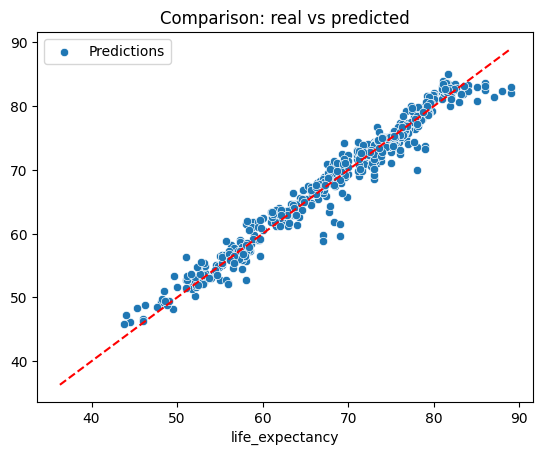

In [32]:
sns.scatterplot(x=y_test,
                y=y_pred,
                label="Predictions")
plt.plot(
    [y.min(), y.max()], [y.min(), y.max()],
    color="red", 
    linestyle="--",
    label="Ideal line")
plt.title("Comparison: real vs predicted")

### 